In [1]:
import pandas as pd

In [2]:
df_job_postings =pd.read_csv('../data/li_job_posting/job_postings.csv')
df_company_details = pd.read_csv('../data/li_job_posting/company_details/companies.csv')

In [3]:
df_job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

In [4]:
df_job_postings = df_job_postings.rename(columns={'title': 'job_title', 'description': 'job_description'})
df_job_postings.head()


,job_id,company_id,job_title,job_description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [5]:
df_company_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11361 entries, 0 to 11360
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    11361 non-null  int64  
 1   name          11360 non-null  object 
 2   description   11218 non-null  object 
 3   company_size  10256 non-null  float64
 4   state         11353 non-null  object 
 5   country       11361 non-null  object 
 6   city          11360 non-null  object 
 7   zip_code      11349 non-null  object 
 8   address       11350 non-null  object 
 9   url           11361 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 887.7+ KB


In [6]:
df_company_details = df_company_details.rename(columns={'name': 'company_name', 'description': 'company_description'})
df_company_details.head()


,company_id,company_name,company_description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle


In [7]:
df_job_postings = df_job_postings[['company_id', 'job_title','job_description','location','remote_allowed','formatted_experience_level', 'work_type', ]]
df_company_details = df_company_details[['company_id', 'company_name', 'company_description', 'company_size', 'zip_code']]

In [8]:
# # dropping nan company_id's from job_listing
# df_job_postings['company_id'].dropna()

In [9]:
merged_df = pd.merge(df_job_postings, df_company_details, on='company_id', how='inner')


### EDA (Exploratory Data Analysis)

In [11]:
display(merged_df.head(), merged_df.describe(include='object'), merged_df.shape)

,company_id,job_title,job_description,location,remote_allowed,formatted_experience_level,work_type,company_name,company_description,company_size,zip_code
0,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,"Little River, SC",NaN,Entry level,FULL_TIME,HearingLife,HearingLife is a national hearing care company...,5.0,08873
1,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,"Beaver Dam, WI",NaN,NaN,FULL_TIME,"Metalcraft of Mayville, Inc.","Headquartered in Mayville, Wisconsin, Metalcra...",4.0,53050
2,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,"Bessemer, AL",NaN,NaN,FULL_TIME,"U.S. Tsubaki Power Transmission, LLC","U.S. Tsubaki Power Transmission, LLC is a subs...",4.0,60090
3,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,"Aliso Viejo, CA",NaN,Entry level,FULL_TIME,Episcopal Communities & Services,Episcopal Communities & Services (ECS) has bec...,4.0,91001
4,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",United States,1.0,Mid-Senior level,FULL_TIME,"iHerb, LLC",iHerb is on a mission to make health and welln...,5.0,92618


,job_title,job_description,location,formatted_experience_level,work_type,company_name,company_description,zip_code
count,32545,32544,32545,23957,32545,32541,32356,32529
unique,22048,29460,4554,6,7,11270,11132,4521
top,Sales Director [Owner/Operator],The Entrepreneur we seek is an experienced sal...,United States,Mid-Senior level,FULL_TIME,Insight Global,Insight Global is an international staffing an...,0
freq,120,78,2267,11209,26345,217,217,2843


(32545, 11)

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32545 entries, 0 to 32544
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company_id                  32545 non-null  float64
 1   job_title                   32545 non-null  object 
 2   job_description             32544 non-null  object 
 3   location                    32545 non-null  object 
 4   remote_allowed              4665 non-null   float64
 5   formatted_experience_level  23957 non-null  object 
 6   work_type                   32545 non-null  object 
 7   company_name                32541 non-null  object 
 8   company_description         32356 non-null  object 
 9   company_size                31096 non-null  float64
 10  zip_code                    32529 non-null  object 
dtypes: float64(3), object(8)
memory usage: 2.7+ MB


In [13]:
print('Unique experience level values:', merged_df['formatted_experience_level'].unique())


print('Unique remote allowed values:', merged_df['remote_allowed'].unique())
merged_df.fillna({'remote_allowed': 0}, inplace=True)
print('Unique remote allowed values:', merged_df['remote_allowed'].unique())

Unique experience level values: ['Entry level' nan 'Mid-Senior level' 'Director' 'Associate' 'Executive'
 'Internship']
Unique remote allowed values: [nan  1.]
Unique remote allowed values: [0. 1.]


Check for description field that have no description

In [14]:
merged_df[pd.isna(merged_df['job_description'])]
merged_df = merged_df.dropna(subset=['job_description'])
merged_df = merged_df.reset_index(drop=True)

check for duplicates 

In [15]:
print(merged_df.duplicated().sum())
print(merged_df.shape)
merged_df = merged_df.drop_duplicates(keep='first')
print(merged_df.shape)

416
(32544, 11)
(32128, 11)


In [16]:
merged_df.head()

,company_id,job_title,job_description,location,remote_allowed,formatted_experience_level,work_type,company_name,company_description,company_size,zip_code
0,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,"Little River, SC",0.0,Entry level,FULL_TIME,HearingLife,HearingLife is a national hearing care company...,5.0,08873
1,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,"Beaver Dam, WI",0.0,NaN,FULL_TIME,"Metalcraft of Mayville, Inc.","Headquartered in Mayville, Wisconsin, Metalcra...",4.0,53050
2,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,"Bessemer, AL",0.0,NaN,FULL_TIME,"U.S. Tsubaki Power Transmission, LLC","U.S. Tsubaki Power Transmission, LLC is a subs...",4.0,60090
3,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,"Aliso Viejo, CA",0.0,Entry level,FULL_TIME,Episcopal Communities & Services,Episcopal Communities & Services (ECS) has bec...,4.0,91001
4,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",United States,1.0,Mid-Senior level,FULL_TIME,"iHerb, LLC",iHerb is on a mission to make health and welln...,5.0,92618


In [17]:
print(merged_df['job_description'].duplicated().sum())

2668


In [18]:
duplicated_job_descriptions = merged_df[merged_df.duplicated(subset=['job_title', 'job_description'], keep=False)]
print("Job descriptions that are the same within the same job title:")
duplicated_job_descriptions[['job_title', 'job_description', 'company_name']]


Job descriptions that are the same within the same job title:


,job_title,job_description,company_name
14,Associate Veterinarian,We are looking to hire an Associate Veterinari...,Vet Doc Hospitals
16,Remote Vacation Planner,Full Job Description\n\nWe are focused on prov...,My Travel Connection
17,Remote Vacation Planner,Full Job Description\n\nWe are focused on prov...,My Travel Connection
19,Sales Manager,Position Summary: Our Sales Manager has managi...,J. Galt
25,Associate Veterinarian,We are looking to hire an Associate Veterinari...,Vet Doc Hospitals
...,...,...,...
32519,"Manager, Salesforce Platform",Invitation Homes is a fast-paced evolving publ...,Invitation Homes
32520,IT Operations ServiceNow Admin,Elastic is a free and open search company that...,Elastic
32522,Customer Success & Services Marketing Manager,Build something new with a world-class team.\n...,Genesys
32526,"Virtual Sales Associate Account Manager, Women...",Job Description Summary \n\nAs the Virtual Sal...,GE HealthCare


In [19]:
# Drop duplicates of job descriptions within the same job title, keeping the first occurrence
unique_job_descriptions = merged_df.drop_duplicates(subset=['job_title', 'job_description'], keep='first')

# Print the DataFrame with unique job descriptions
print("DataFrame with unique job descriptions within the same job title:")
display(unique_job_descriptions.head(), unique_job_descriptions.shape)   


DataFrame with unique job descriptions within the same job title:


,company_id,job_title,job_description,location,remote_allowed,formatted_experience_level,work_type,company_name,company_description,company_size,zip_code
0,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,"Little River, SC",0.0,Entry level,FULL_TIME,HearingLife,HearingLife is a national hearing care company...,5.0,08873
1,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,"Beaver Dam, WI",0.0,NaN,FULL_TIME,"Metalcraft of Mayville, Inc.","Headquartered in Mayville, Wisconsin, Metalcra...",4.0,53050
2,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,"Bessemer, AL",0.0,NaN,FULL_TIME,"U.S. Tsubaki Power Transmission, LLC","U.S. Tsubaki Power Transmission, LLC is a subs...",4.0,60090
3,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,"Aliso Viejo, CA",0.0,Entry level,FULL_TIME,Episcopal Communities & Services,Episcopal Communities & Services (ECS) has bec...,4.0,91001
4,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",United States,1.0,Mid-Senior level,FULL_TIME,"iHerb, LLC",iHerb is on a mission to make health and welln...,5.0,92618


(29894, 11)

In [20]:
df_unique = unique_job_descriptions.copy()
df_unique['job_description'] = df_unique['job_title'] + " " + df_unique['job_description']

### Cleaning and Lemmatizing job descriptions

In [25]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(description):
    """
    Descr: Clean text data by removing punctuation, stopwords, and converting to lowercase.
    Input: text
    Output: cleaned text
    """
    description = re.sub(r"\{\{.*?\}\}", "", description)
    description = word_tokenize(description)
    description = [w.lower() for w in description]
    description = [word for word in description if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    description = [word for word in description if word not in stop_words]
    return ' '.join(description)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/diegosabajo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/diegosabajo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diegosabajo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/diegosabajo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
# df_unique = unique_job_descriptions.copy()
df_unique['job_description_clean'] = df_unique['job_description'].apply(clean_text)

In [27]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize

def nltk_to_wordnet_pos(nltk_tag):
    """
    Descr: Convert NLTK POS tag to WordNet POS tag.
    Input: nltk_tag
    Output: wordnet_pos
    """
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
      
def lemmatizer(data): 
  lemmatizer = WordNetLemmatizer() 
  tokens = word_tokenize(data)
  pos_tags = pos_tag(tokens)
  
  lemmatized_words = [] 
  for word, tag in pos_tags:
    wn_tag = nltk_to_wordnet_pos(tag)
    if wn_tag is None: 
      lemmatized_word = lemmatizer.lemmatize(word)
    else:
      lemmatized_word = lemmatizer.lemmatize(word, pos=wn_tag)
    lemmatized_words.append(lemmatized_word)      
  return  ' '.join(lemmatized_words)

In [28]:
df_unique['job_description_clean'] = df_unique['job_description_clean'].apply(lambda x: lemmatizer(x))

### Save the cleaned and lemmatized job descriptions in a csv file because processing can take a while

In [29]:
df_unique.to_csv('../data/li_job_posting/df_unique_clean.csv', index=False)

#### Load processed dataframe 

In [30]:
import pandas as pd
df_unique = pd.read_csv('../data/li_job_posting/df_unique_clean.csv')
df_unique.head()

,company_id,job_title,job_description,location,remote_allowed,formatted_experience_level,work_type,company_name,company_description,company_size,zip_code,job_description_clean
0,553718.0,Hearing Care Provider,Hearing Care Provider Overview\n\nHearingLife ...,"Little River, SC",0.0,Entry level,FULL_TIME,HearingLife,HearingLife is a national hearing care company...,5.0,08873,hear care provider overview hearinglife nation...
1,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Shipping & Receiving Associate 2nd shift (Beav...,"Beaver Dam, WI",0.0,NaN,FULL_TIME,"Metalcraft of Mayville, Inc.","Headquartered in Mayville, Wisconsin, Metalcra...",4.0,53050,ship receive associate shift beaver dam metalc...
2,474443.0,"Manager, Engineering","Manager, Engineering \nThe TSUBAKI name is syn...","Bessemer, AL",0.0,NaN,FULL_TIME,"U.S. Tsubaki Power Transmission, LLC","U.S. Tsubaki Power Transmission, LLC is a subs...",4.0,60090,manager engineering tsubaki name synonymous ex...
3,18213359.0,Cook,Cook descriptionTitle\n\n Looking for a great ...,"Aliso Viejo, CA",0.0,Entry level,FULL_TIME,Episcopal Communities & Services,Episcopal Communities & Services (ECS) has bec...,4.0,91001,cook descriptiontitle look great opportunity d...
4,437225.0,Principal Cloud Security Architect (Remote),Principal Cloud Security Architect (Remote) Jo...,United States,1.0,Mid-Senior level,FULL_TIME,"iHerb, LLC",iHerb is on a mission to make health and welln...,5.0,92618,principal cloud security architect remote job ...


In [31]:
n = 10
common_job_roles = df_unique['job_title'].value_counts().head(n)
print(f'Top {n} most common job roles:')
print(common_job_roles)

Top 10 most common job roles:
job_title
Project Manager                    94
Senior Accountant                  78
Customer Service Representative    76
Staff Accountant                   74
Administrative Assistant           74
Executive Assistant                64
Controller                         59
Account Executive                  54
Accounting Manager                 50
Software Engineer                  49
Name: count, dtype: int64


In [32]:
duplicate_job_desc = df_unique[df_unique['job_description_clean'].duplicated()]['job_description_clean']
print("Sample duplicate job descriptions:")
print(duplicate_job_desc.head())


Sample duplicate job descriptions:
24     associate veterinarian look hire associate vet...
35     additional design strategy write project manag...
53     body technician company gerber collision glass...
219    regional account manager sell imagine life wit...
269    regional account manager sell imagine life wit...
Name: job_description_clean, dtype: object


### Data Scientist jobs

#### Exclude terms of higher seniority or positions not related to resume.

In [33]:
import re

keywords = ['Data Science', 'Data Scientist', 'MLOps', 'Machine Learning Engineer', 'Machine Learning', 'Artificial Intelligence', 'Deep Learning', 'Natural Language Processing']
seniority_terms = ['Principal', 'Lead', 'Senior', 'Manager', 'Director', 'Head', 'Sr', 'Expert', 'Researcher']

seniority_pattern = '|'.join(seniority_terms)
pattern = '|'.join(keywords)


combined_pattern = re.compile(f"^(?!.*\\b(?:{'|'.join(seniority_terms)})\\b).*\\b({pattern})\\b", flags=re.IGNORECASE)
data_jobs = df_unique[df_unique['job_title'].apply(lambda x: bool(combined_pattern.search(x)))]

non_data_jobs = df_unique[~df_unique['job_title'].str.contains(pattern, case=False, regex=True)]

display(data_jobs.head(), data_jobs.shape)
display(non_data_jobs.head(), non_data_jobs.shape)
print(data_jobs['job_title'].unique())




,company_id,job_title,job_description,location,remote_allowed,formatted_experience_level,work_type,company_name,company_description,company_size,zip_code,job_description_clean
643,98795204.0,Machine Learning Engineer,Machine Learning Engineer Company DescriptionW...,"San Jose, CA",0.0,NaN,FULL_TIME,Docta.ai,NaN,NaN,0,machine learn engineer company descriptionwe s...
711,3517767.0,"Data Scientist I, Revenue","Data Scientist I, Revenue Our Mission\n\nAs hu...","West Hollywood, CA",0.0,Entry level,FULL_TIME,Tinder,"As humans, there are few things more exciting ...",3.0,90069,data scientist revenue mission human thing exc...
1592,80078844.0,Artificial Intelligence Intern,Artificial Intelligence Intern Our company is ...,"California, United States",1.0,NaN,INTERNSHIP,Tokenizz,Tokenizz brings the future of capital investme...,2.0,0,artificial intelligence intern company seek dr...
2160,26945.0,Data Scientist,Data Scientist It's fun to work in a company w...,"California, United States",0.0,Entry level,FULL_TIME,Fractal,Fractal is one of the most prominent providers...,5.0,0,data scientist fun work company people truly b...
2275,12957486.0,Machine Learning Research Scientist,Machine Learning Research Scientist Who We Are...,"Mountain View, CA",0.0,Mid-Senior level,FULL_TIME,Nuro,We're on a mission to better everyday life thr...,5.0,0,machine learn research scientist nuro exist go...


(69, 12)

,company_id,job_title,job_description,location,remote_allowed,formatted_experience_level,work_type,company_name,company_description,company_size,zip_code,job_description_clean
0,553718.0,Hearing Care Provider,Hearing Care Provider Overview\n\nHearingLife ...,"Little River, SC",0.0,Entry level,FULL_TIME,HearingLife,HearingLife is a national hearing care company...,5.0,08873,hear care provider overview hearinglife nation...
1,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Shipping & Receiving Associate 2nd shift (Beav...,"Beaver Dam, WI",0.0,NaN,FULL_TIME,"Metalcraft of Mayville, Inc.","Headquartered in Mayville, Wisconsin, Metalcra...",4.0,53050,ship receive associate shift beaver dam metalc...
2,474443.0,"Manager, Engineering","Manager, Engineering \nThe TSUBAKI name is syn...","Bessemer, AL",0.0,NaN,FULL_TIME,"U.S. Tsubaki Power Transmission, LLC","U.S. Tsubaki Power Transmission, LLC is a subs...",4.0,60090,manager engineering tsubaki name synonymous ex...
3,18213359.0,Cook,Cook descriptionTitle\n\n Looking for a great ...,"Aliso Viejo, CA",0.0,Entry level,FULL_TIME,Episcopal Communities & Services,Episcopal Communities & Services (ECS) has bec...,4.0,91001,cook descriptiontitle look great opportunity d...
4,437225.0,Principal Cloud Security Architect (Remote),Principal Cloud Security Architect (Remote) Jo...,United States,1.0,Mid-Senior level,FULL_TIME,"iHerb, LLC",iHerb is on a mission to make health and welln...,5.0,92618,principal cloud security architect remote job ...


(29769, 12)

['Machine Learning Engineer' 'Data Scientist I, Revenue'
 'Artificial Intelligence Intern' 'Data Scientist'
 'Machine Learning Research Scientist' 'Staff Machine Learning Engineer'
 'Graduate (Year-Long) Intern – Neurosymbolic Artificial Intelligence for Energy Systems'
 'Python Developer/ Data Scientist -W2 only' 'Data Scientist Intern'
 'Machine Learning Engineer - $175k+' 'Data Scientist - $175k+'
 'Artificial Intelligence Engineer' 'Computer Vision Data Scientist'
 'ML Ops Data Scientist with Azure' 'MLOps Generative AI Engineer'
 'Data Scientist, Algorithms - Driver Incentives'
 'Summer 2024, Intern: Fluid Dynamics Data Scientist (Remote/Hybrid)'
 'Data Scientist (Mid-Level)'
 'Staff Bioinformatics Scientist (Machine Learning)'
 'Software Engineer, Machine Learning - Reality Labs'
 'Data Scientist / Operations Research Analyst'
 'Data Science & AI - ML Internship'
 'Mentor - Machine Learning Career Track (Part-time/Contract)'
 'Machine Learning Engineer 5'
 'Data Center Technician

In [34]:
data_jobs['job_description_clean'].loc[643]

'machine learn engineer company descriptionwe startup provide data ai model look start http role descriptionthe machine learn engineer work closely teams prepare datasets train machine learning model startup strong background machine learn aiexperience design data pipeline develop machine learning model use python pytorchstrong skill ability think criticallyat least bachelor degree computer science statistic relate fieldstrong ability work independently well collaboratively team environmenthaving relevant publication top conference include limited icml iclr neurips plus work projectsbuilding product early stake'

In [35]:
from IPython.display import display, HTML 
display(HTML(data_jobs['job_description'].loc[643]))

### Top 10 words in the (under the data science umbrella jobs) 

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 

def rank_words(text_list):
    """
    Function to rank the words in the text list
    Args:
        text_list (array): list of strings

    Returns:
        dataframe: sorted list of words
    """
    vectorizer = TfidfVectorizer(stop_words='english', norm='l2', ngram_range=(1, 3))
    tfidf_matrix = vectorizer.fit_transform(text_list).toarray()
    df = pd.DataFrame({'Words': vectorizer.get_feature_names_out(), 'Summed TFIDF': tfidf_matrix.sum(axis=0)})
    sorted_df = df.sort_values('Summed TFIDF', ascending=False)
    return sorted_df

def process_text_in_batches(text_list, batch_size):
    """Allowing batch processing

    Args:
        text_list (series): job description
        batch_size (int): the size of the batches to be processed.

    Returns:
        _type_: _description_
    """
    num_batches = len(text_list) // batch_size + (1 if len(text_list) % batch_size != 0 else 0)
    results = []
    for i in range(num_batches):
        batch = text_list[i * batch_size: (i + 1) * batch_size]
        sorted_df = rank_words(batch)
        results.append(sorted_df)
    return pd.concat(results)

# Example usage
all_descriptions = []
for descriptions in data_jobs['job_description_clean']:
    all_descriptions.append(descriptions)

batch_size = 50  # Define your desired batch size
sorted_df = process_text_in_batches(all_descriptions, batch_size)
print(sorted_df[:10].to_string(index=False))


         Words  Summed TFIDF
          data      3.711918
       machine      1.842749
    experience      1.839692
         learn      1.805005
          work      1.701092
 machine learn      1.441235
         model      1.303989
          team      1.282348
data scientist      1.111211
     scientist      1.102573


#### Upload your own resume file

In [40]:
import pdftotext

with open("../data/Diego_Resume.pdf", "rb") as f:
    pdf = pdftotext.PDF(f)

resume = "\n\n".join(pdf)


In [41]:
text_clean = clean_text(resume)
lemmatized_resume = lemmatizer(text_clean)
print(lemmatized_resume)

diego sabajo dedicate data scientist machine learn engineer focus nlp generative ai bring experience orchestrate paramaribo suriname mobile nlp project expertise encompasses build chatbots use rag model llm deploy scalable cloud solution additionally research make llm less computationally expensive training inference commitment link linkedin merely ensure project success elevate excellence portfolio perpetual quest seamlessly merge technical acumen strategic github insight aspiration make profound impact world ai skill experience zennoai stealth startup paramaribo suriname nlp engineer november present spearhead development machine chatbot use advanced nlp technique incorporate langchain llm enhance language processing capability llms q en text sql dataset evaluate model various benchmark rouge bleu score maximize model efficiency leverage qlora parameter efficient reduce model size significant compute saving maintain high accuracy result fast inference speed reduce operational cost im

In [42]:
print(data_jobs['job_description_clean'].shape)
print(len(lemmatized_resume))

(69,)
5168


In [43]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def compute_similarity_score(job_descriptions, resume, vectorizer):
  """
  Function to compute the cosine similarity score between the job descriptions and the resume.
  Args:
    job_descriptions (series): job descriptions
    resume (string): resume
  """
  text_list = job_descriptions.values.tolist() + [resume]
  tfidf_matrix = vectorizer.fit_transform(text_list)
  similarity_scores = cosine_similarity(tfidf_matrix[:-1], tfidf_matrix[-1])
  return similarity_scores


def get_recommendation(n, data_jobs, resume, vectorizer):
  """
  Function to get the top n job descriptions that are most similar to the resume.
  Args:
    n (int): number of job descriptions to return
    data_jobs (dataframe): dataframe of job descriptions
  """
  similarity_scores = compute_similarity_score(data_jobs['job_description_clean'], resume, vectorizer)
  top_n_indices = np.argsort(similarity_scores, axis=0)[-n:].flatten()
  
  top_n_jobs = []
  for index in top_n_indices[::-1]:
      job_title = data_jobs.iloc[index]['job_title']
      job_descriptions = data_jobs.iloc[index]['job_description_clean']
      similarity_score = similarity_scores[index][0]
      top_n_jobs.append({'job_title': job_title, 'job_description_clean': job_descriptions, 'similarity_scores': similarity_score})

  return pd.DataFrame(top_n_jobs)

### Experiment which Vectorize gives better results. 

##### CountVectorizer

In [44]:
n = 10
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
top_n_jobs_cv = get_recommendation(n, data_jobs, lemmatized_resume, vectorizer)
top_n_jobs_cv.head(n)

,job_title,job_description_clean,similarity_scores
0,Machine Learning Scientist I,machine learn scientist flexible within wa id ...,0.289581
1,Data Scientist,data scientist job descriptionwe seek talented...,0.259901
2,Natural Language Processing (NLP) Data Scientist.,natural language processing nlp data scientist...,0.257576
3,Data Scientist,data scientist bgsf vision technology service ...,0.257341
4,Data Scientist,data scientist job title data scientist job de...,0.253130
5,Mentor - Machine Learning Career Track (Part-t...,mentor machine learn career track company spri...,0.243072
6,Machine Learning Engineer - $175k+,machine learn engineer henderson harbor group ...,0.236106
7,Machine Learning Engineer,machine learn engineer forge nyse frge know te...,0.227540
8,Data Scientist,data scientist role data scientist location st...,0.225559
9,Data Scientist - $175k+,data scientist henderson harbor group premier ...,0.222619


#### TFIDF Vectorizer

In [45]:
n = 10
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
top_n_jobs_tfidf = get_recommendation(n, data_jobs, lemmatized_resume, vectorizer)
top_n_jobs_tfidf.head(n)

,job_title,job_description_clean,similarity_scores
0,Machine Learning Scientist I,machine learn scientist flexible within wa id ...,0.103726
1,Data Scientist,data scientist bgsf vision technology service ...,0.093783
2,Natural Language Processing (NLP) Data Scientist.,natural language processing nlp data scientist...,0.089138
3,Data Scientist,data scientist job descriptionwe seek talented...,0.079131
4,Data Scientist/ Product Analyst,data product analyst look candidate year exper...,0.077455
5,Data Scientist,data scientist job title data scientist job de...,0.077185
6,Machine Learning Engineer - $175k+,machine learn engineer henderson harbor group ...,0.076552
7,Artificial Intelligence Engineer,artificial intelligence engineer aboutwe make ...,0.072100
8,Machine Learning Engineer,machine learn engineer forge nyse frge know te...,0.069785
9,Mentor - Machine Learning Career Track (Part-t...,mentor machine learn career track company spri...,0.068950


### Pre-Trained Word Embeddings

#### WORD2Vec

In [70]:
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

def compute_job_description_embeddings(job_descriptions, word2vec_model):
  """
  Function to compute the embeddings for the job descriptions.
  Args:
    job_descriptions (series): job descriptions
    word2vec_model (KeyedVectors): word2vec model
  Returns: job_description_embeddings
  """
  job_embeddings = []
  for description in job_descriptions:
      tokens = description.split(' ')
      valid_tokens = [word for word in tokens if word in word2vec_model]
      if valid_tokens:
          description_embedding = np.mean([word2vec_model[word] for word in valid_tokens], axis=0)
          job_embeddings.append(description_embedding)
  return job_embeddings

def compute_resume_embbeddings(resume, word2vec_model):
  """
  Function to compute the embeddings for the resume.
  Args:
    resume (string): resume
    word2vec_model (KeyedVectors): word2vec model
  Returns: resume_embeddings
  """
  resume_tokens = resume.split(' ')
  valid_resume_tokens = [word for word in resume_tokens if word in word2vec_model]
  if valid_resume_tokens:
      resume_embedding = np.mean([word2vec_model[word] for word in valid_resume_tokens], axis=0)
  else:
      resume_embedding = None
  return resume_embedding


def compute_similarity_score_w2v(job_descriptions, resume, word2vec_model):
    """
    Function to compute the cosine similarity score between the job descriptions and the resume.
    Args:
      job_descriptions (series): job descriptions
      resume (string): resume
      word2vec_model (KeyedVectors): word2vec model
    Returns: similarity_score
    """
    job_embeddings = compute_job_description_embeddings(job_descriptions, word2vec_model)
    resume_embedding = compute_resume_embbeddings(resume, word2vec_model)

    similarity_scores = []
    for job_embedding in job_embeddings:
        if resume_embedding is not None:
            similarity_score = cosine_similarity([job_embedding], [resume_embedding])[0][0]
            similarity_scores.append(similarity_score)
        else:
            similarity_scores.append(0.0)

    return similarity_scores 

def get_recommendation_w2v(n, data_jobs, resume, word2vec_model):
    """
    Function to get the top n job descriptions that are most similar to the resume.
    Args:
      n (int): number of job descriptions to return
      data_jobs (dataframe): dataframe of job descriptions
      resume (string): resume
      word2vec_model (KeyedVectors): word2vec model
    Returns: top_n_jobs
    """
    similarity_scores = compute_similarity_score_w2v(data_jobs['job_description_clean'], resume, word2vec_model)
    top_n_indices = np.argsort(similarity_scores)[-n:][::-1]

    top_n_jobs = []
    for index in top_n_indices:
        if index < len(data_jobs):
            job_title = data_jobs.iloc[index]['job_title']
            job_descriptions = data_jobs.iloc[index]['job_description_clean']
            similarity_score = similarity_scores[index]
            top_n_jobs.append({'job_title': job_title, 'job_description_clean': job_descriptions, 'similarity_scores': similarity_score})
        else:
            print("Index out of bounds:", index)

    return pd.DataFrame(top_n_jobs)

w2v_model = KeyedVectors.load_word2vec_format('../data/embeddings/GoogleNews-vectors-negative300.bin', binary=True)
top_n_jobs_w2c = get_recommendation_w2v(10, data_jobs, lemmatized_resume, w2v_model)

In [71]:
top_n_jobs_w2c

,job_title,job_description_clean,similarity_scores
0,Artificial Intelligence Engineer,artificial intelligence engineer please note p...,0.936053
1,Machine Learning Infrastructure Software Engin...,machine learn infrastructure software engineer...,0.931174
2,Machine Learning Engineer 5,machine learn engineer company change world di...,0.929532
3,Data Scientist,data scientist role open successful candidate ...,0.926054
4,Data Scientist,data scientist job descriptionwe seek talented...,0.924325
5,Data Scientist,data scientist job title data scientist job de...,0.922384
6,Data Scientist / Operations Research Analyst,data scientist operation research analyst linq...,0.922345
7,Machine Learning Scientist I,machine learn scientist flexible within wa id ...,0.919103
8,Data Scientist,data scientist career focus change world energ...,0.916619
9,Machine Learning Engineer,machine learn engineer forge nyse frge know te...,0.913840


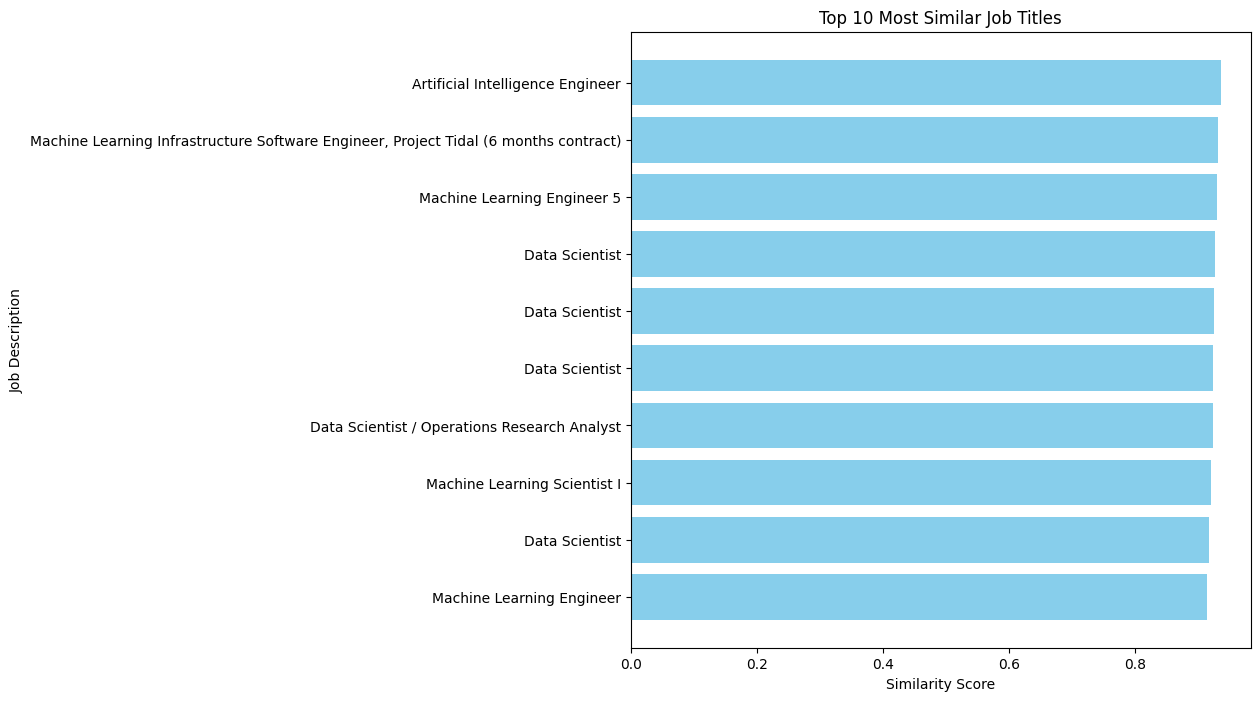

In [72]:
import matplotlib.pyplot as plt

def job_relevance_visualization(n):
    """
    Function to visualize the job relevance scores.
    """
    plt.figure(figsize=(8, 8))
    plt.barh(range(n), top_n_jobs_w2c['similarity_scores'], color='skyblue')
    plt.xlabel('Similarity Score')
    plt.ylabel('Job Description')
    plt.yticks(range(n), top_n_jobs_w2c['job_title'])
    plt.title(f'Top {n} Most Similar Job Titles')
    plt.gca().invert_yaxis()
    plt.show()

job_relevance_visualization(10)

#### Plotting Job  ranking vs. relevance

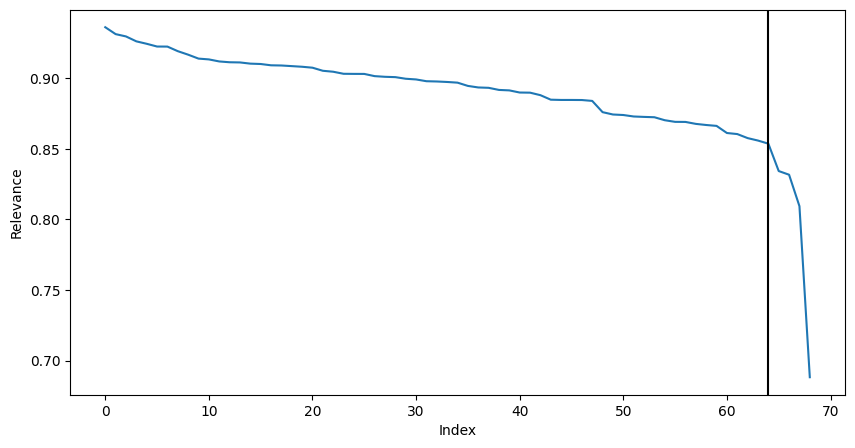

In [73]:
import matplotlib.pyplot as plt 

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
similarity_scores = compute_similarity_score_w2v(data_jobs['job_description_clean'], lemmatized_resume, w2v_model)

plt.figure(figsize=(10, 5))
plt.plot(range(data_jobs.shape[0]), sorted(similarity_scores, reverse=True))
plt.xlabel('Index')
plt.ylabel('Relevance')
plt.axvline(64, c='k')
plt.show()

In [74]:
n = 64
# vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
top_n_jobs_tfidf = get_recommendation_w2v(n, data_jobs, lemmatized_resume, w2v_model)
top_n_jobs_tfidf.head(n)

,job_title,job_description_clean,similarity_scores
0,Artificial Intelligence Engineer,artificial intelligence engineer please note p...,0.936053
1,Machine Learning Infrastructure Software Engin...,machine learn infrastructure software engineer...,0.931174
2,Machine Learning Engineer 5,machine learn engineer company change world di...,0.929532
3,Data Scientist,data scientist role open successful candidate ...,0.926054
4,Data Scientist,data scientist job descriptionwe seek talented...,0.924325
...,...,...,...
59,Artificial Intelligence Intern,artificial intelligence intern company seek dr...,0.866213
60,Data Scientist,data scientist data scientist job summary appl...,0.861170
61,Data Scientist,data scientist role descriptionthis contract d...,0.860423
62,Data Scientist - $175k+,data scientist henderson harbor group premier ...,0.857562


### Topic Modelling

In [75]:
def create_vocab(data):
  """
  Function to create a vocabulary for the job descriptions.
  Args:
    data (dataframe): dataframe of job descriptions
  Returns: vecotrizer, vocabulary matrix
  """
  vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
  dtm  = vectorizer.fit_transform(data)
  dtm = dtm.toarray() 
  return vectorizer, dtm 

In [77]:
vectorizer, dtm_job_descriptions = create_vocab(top_n_jobs_w2c['job_description_clean'])
# print(vectorizer.vocabulary_)
print(dtm_job_descriptions.shape)

(10, 4677)


#### Topic Modelling on the relevant job descriptions

In [78]:
from sklearn.decomposition import LatentDirichletAllocation

def lda_topics(dtm, vectorizer, n_topics, n_top_words):
    """
    Function to perform LDA on the job descriptions.
    Args:
      dtm (array): document-term matrix
      vectorizer (TfidfVectorizer): vectorizer
      n_topics (int): number of topics
      n_top_words (int): number of top words
    """
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(dtm)
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        print(f"Topic #{topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

In [79]:
lda_topics(dtm_job_descriptions, vectorizer, 10, 5)

Topic #1:
adobe forge private experience company

Topic #2:
environment write innovative join communication

Topic #3:
ml machine learn machine learn cloud platform

Topic #4:
environment write innovative join communication

Topic #5:
environment write innovative join communication

Topic #6:
environment write innovative join communication

Topic #7:
data learn health machine learn machine

Topic #8:
environment write innovative join communication

Topic #9:
experience data linquest statistical inl

Topic #10:
connect knowledge work work knowledge fleet



#### Topic modelling on resume

In [80]:
vectorizer, dtm_resume = create_vocab([lemmatized_resume])
lda_topics(dtm_resume, vectorizer, 1, 5)

Topic #1:
model user project data use



### Clustering job skills

In [81]:
def extract_nouns_and_verbs(text):
    """
    Function to extract nouns and verbs from the job descriptions.
    Args:
      text (string): job description
    Returns: words of consisting of nouns and verbs
    """
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    nouns_verbs = [word for word, pos in tagged_tokens if pos.startswith('N')]  
    return ' '.join(nouns_verbs) 

top_n_jobs_w2c['skills'] = top_n_jobs_w2c['job_description_clean'].apply(extract_nouns_and_verbs)

display(top_n_jobs_tfidf.head())

,job_title,job_description_clean,similarity_scores
0,Artificial Intelligence Engineer,artificial intelligence engineer please note p...,0.936053
1,Machine Learning Infrastructure Software Engin...,machine learn infrastructure software engineer...,0.931174
2,Machine Learning Engineer 5,machine learn engineer company change world di...,0.929532
3,Data Scientist,data scientist role open successful candidate ...,0.926054
4,Data Scientist,data scientist job descriptionwe seek talented...,0.924325


In [82]:
total_skills = []

for skills in top_n_jobs_w2c['skills'].tolist():
  total_skills.append(skills)
  
df_skills = pd.DataFrame({'Skills': total_skills})
print(df_skills.describe())
display(df_skills.head(), df_skills.shape)

                                                   Skills
count                                                  10
unique                                                 10
top     intelligence engineer please note position lev...
freq                                                    1


,Skills
0,intelligence engineer please note position lev...
1,machine learn infrastructure software engineer...
2,machine learn engineer company change world ex...
3,data scientist role candidate gc work requirem...
4,data scientist job seek machine learn engineer...


(10, 1)

In [84]:
total_skills = sorted(set(total_skills))
vectorizer = TfidfVectorizer(stop_words='english', norm='l2', ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(total_skills)
num_rows, num_cols = tfidf_matrix.shape  
print(f'Our matrix has {num_rows} and {num_cols} columns')

Our matrix has 10 and 3070 columns


In [85]:
import numpy as np 
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 

np.random.seed(42)

def shrink_matrix(tfidf_matrix):
    """Reduces the matrix to 100 dimensions and normalizes it.

    Args:
        tfidf_matrix (np.array): Matrix of TF-IDF values.

    Returns:
        np.array: Reduced and normalized matrix (100 dimensions).
    """
    svd_obj = TruncatedSVD(n_components=100)  # Reduce matrix to 100 dimensions
    shrunk_matrix = svd_obj.fit_transform(tfidf_matrix)
    shrunk_norm_matrix = normalize(shrunk_matrix)
    return shrunk_norm_matrix
  
shrunk_norm_matrix = shrink_matrix(tfidf_matrix)
shrunk_norm_matrix.shape

(10, 10)

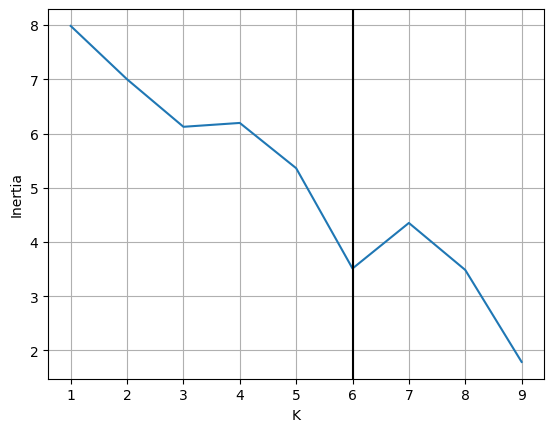

In [86]:
np.random.seed(0)
from sklearn.cluster import MiniBatchKMeans

def generate_elbow_plot(matrix, n):
  """Generates the elbow plot for the given matrix.

  Args:
      matrix (np.array): Matrix of TF-IDF values.
      n (int): Number of clusters.
  """
  k_values = range(1, n) 
  intertia_values = [MiniBatchKMeans(k).fit(matrix).inertia_ for k in k_values]
  plt.plot(k_values, intertia_values)
  plt.xlabel('K')
  plt.ylabel('Inertia')
  plt.axvline(6, c='k')
  plt.grid(True)
  plt.show()
  
generate_elbow_plot(shrunk_norm_matrix, shrunk_norm_matrix.shape[0])

the location of the elbow curve is around k = 100, we will use that as our cut off

In [87]:
from sklearn.cluster import KMeans 

np.random.seed(0) 

def compute_cluster_groups(shrunk_norm_matrix, k, skills):
  """Computes the cluster groups for the given matrix.

  Args:
      shrunk_norm_matrix (np.array): Matrix of TF-IDF values.
      k (int): Number of clusters.
      skills (list): List of skills.
  Returns: Clusters of the given cluster groups
  """
  cluster_model = KMeans(n_clusters=k)
  clusters = cluster_model.fit_predict(shrunk_norm_matrix)
  df = pd.DataFrame({'Index': range(clusters.size), 'Cluster': clusters, 'skills': skills})
  return [df_cluster for _, df_cluster in df.groupby('Cluster')]

cluster_groups = compute_cluster_groups(shrunk_norm_matrix, 6, total_skills)

In [88]:
for cluster in cluster_groups:
  print('length', len(cluster))
  # print(cluster)

length 1
length 1
length 2
length 3
length 2
length 1


#### Visualizing first cluster

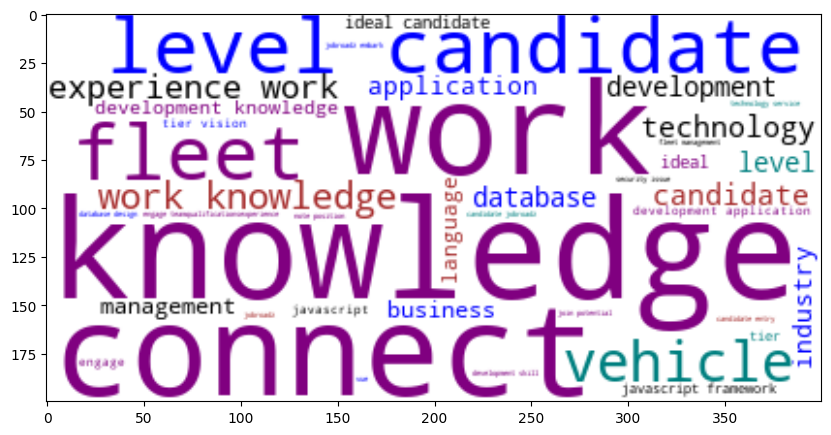

In [90]:
from wordcloud import WordCloud
np.random.seed(0)

def cluster_to_image(df_cluster, max_words=40, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer):
  """Converts the given cluster to an image.
  Args:
      df_cluster (pd.DataFrame): Cluster of the given cluster groups.
      max_words (int): Maximum number of words to display.
      tfidf_matrix (np.array): Matrix of TF-IDF values.
      vectorizer (TfidfVectorizer): Vectorizer.
  Returns: Image of the given cluster.
  """
  indices = df_cluster.Index.values 
  summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0))[0]
  data = {'Word': vectorizer.get_feature_names_out(), 'Summed TFIDF': summed_tfidf}
  df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)
  words_to_socre = {word: score for word, score in df_ranked_words[:max_words].values if score != 0}
  cloud_generator = WordCloud(background_color='white', color_func=_color_func,
                              random_state=1)
  wordcloud_image = cloud_generator.fit_words(words_to_socre)
  return wordcloud_image

def _color_func(*args, **kwargs): 
  return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown'])

wordcloud_image = cluster_to_image(cluster_groups[0])
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.show()

#### Printing sample bullets from cluster 0 

In [91]:
np.random.seed(1)
def print_cluster_sample(cluster_id):
  df_cluster = cluster_groups[cluster_id]
  for bullet in np.random.choice(df_cluster['skills'].values, 1, replace=False):
    print(bullet)
    
print_cluster_sample(0)

intelligence engineer please note position level candidate entry level candidate jobroadz embark mission fleet industry technology service business sizes asset opportunity way business process act data order cost increase productivity function ideal candidate industry experience work pace environment box creativity innovation software architecture development skill roadz technology domain connect vehicle vehicle fleet management moretop tier vision retirement time life engage teamqualificationsexperience year experience work product development knowledge language python javascript framework suit application integration understanding work apis language processing knowledge nlp concept understand output application model database database design query management sql nosql write communication qualificationssecurity security issue applicationsweb development application skill react vue backend django flask technology work knowledge aws gcp base automation work knowledge b computer science 

#### Visualizing all n clusters

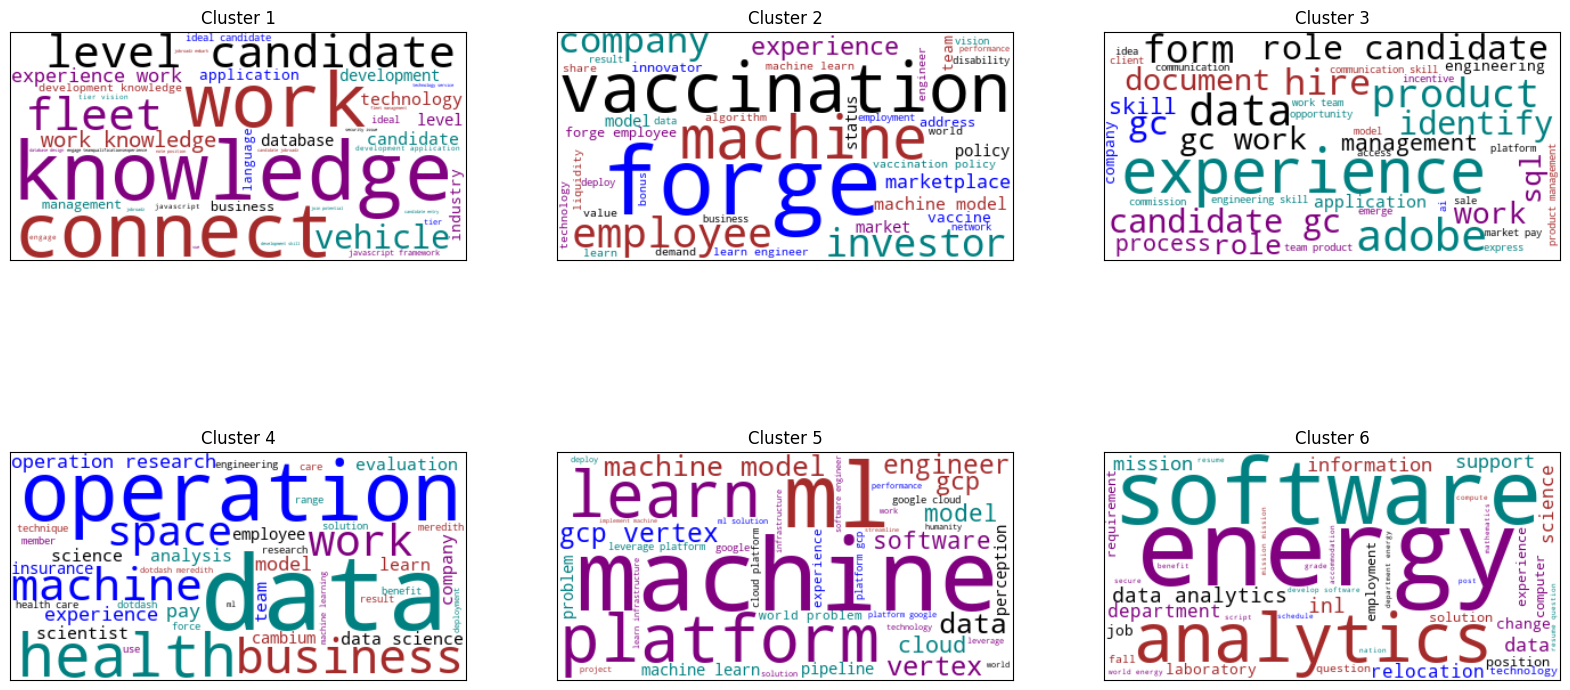

In [93]:
def plot_wordcloud_grid(cluster_groups, num_rows=2, num_cols=3, fig_size=(10, 25), **kwargs):
    figure, axes = plt.subplots(num_rows, num_cols, figsize=fig_size)
    cluster_groups_copy = cluster_groups[:]
    for r in range(num_rows):
        for c in range(num_cols):
            if not cluster_groups_copy:
                break

            df_cluster = cluster_groups_copy.pop(0)
            wordcloud_image = cluster_to_image(df_cluster, **kwargs)
            ax = axes[r][c]
            ax.imshow(wordcloud_image, interpolation='bilinear')
            ax.set_title(f'Cluster {df_cluster.Cluster.iloc[0] + 1}')
            ax.set_xticks([])
            ax.set_yticks([])

plot_wordcloud_grid(cluster_groups, fig_size=(20, 10))
plt.show()
